In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')

In [470]:
#used variable
propotion_train_test = 0.95
len_input_parameter_lstm = 60
p_input_lstm = len_input_parameter_lstm
p_agg_out = 6

In [420]:
df = pd.read_csv('./dataset/raw_stock_data/EXCL.JK.csv')

In [421]:
df = df.dropna()

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2221
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2208 non-null   object 
 1   Open       2208 non-null   float64
 2   High       2208 non-null   float64
 3   Low        2208 non-null   float64
 4   Close      2208 non-null   float64
 5   Adj Close  2208 non-null   float64
 6   Volume     2208 non-null   float64
dtypes: float64(6), object(1)
memory usage: 138.0+ KB


In [423]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-15,1282.310059,1282.310059,1183.670044,1183.670044,1086.861206,15207.0
1,2009-06-16,1282.310059,1282.310059,1282.310059,1282.310059,1177.433594,5576.0
2,2009-06-17,1193.530029,1232.989990,1193.530029,1193.530029,1095.914551,4055.0
3,2009-06-18,1262.579956,1262.579956,1262.579956,1262.579956,1159.317383,5069.0
4,2009-06-19,1262.579956,1262.579956,1262.579956,1262.579956,1159.317383,2.0


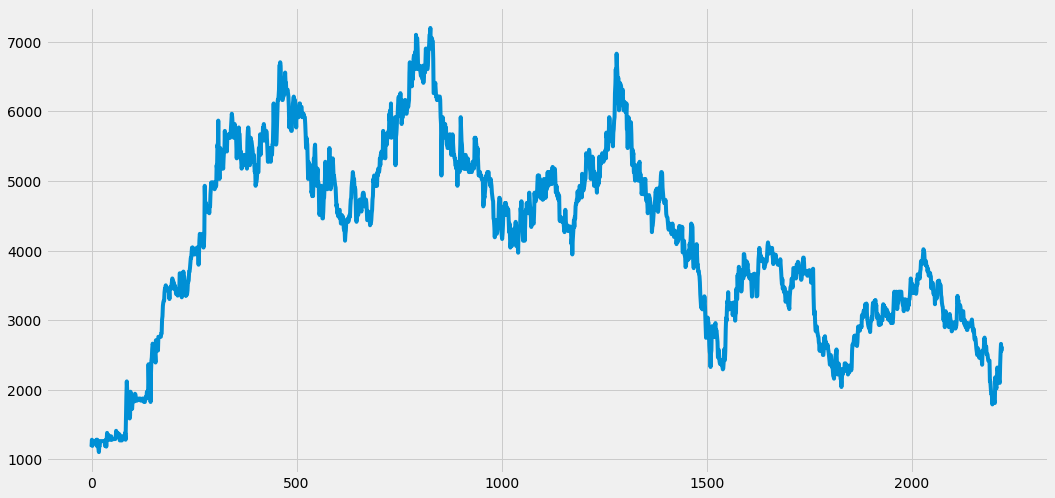

In [424]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()

In [425]:
data = df.filter(['Close'])
dataset = data.values
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01294479],
       [0.02912619],
       [0.01456227],
       ...,
       [0.25020793],
       [0.25020793],
       [0.25020793]])

In [405]:
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset)*propotion_train_test)
training_data_len

1769

array([[0.03058511],
       [0.03457447],
       [0.04255319],
       ...,
       [0.74069149],
       [0.71077128],
       [0.72739362]])

In [345]:
# create train dataset
train_data = scaled_data[0:training_data_len,:]
x_train=[]
y_train=[] 
for i in range(len_input_parameter_lstm, len(train_data)):
    x_train.append(train_data[i-len_input_parameter_lstm:i, 0])
    y_train.append(train_data[i,0])

In [346]:
x_train[0]

array([0.57724746, 0.57724746, 0.57724746, 0.57383816, 0.58065675,
       0.57724746, 0.54315451, 0.52610804, 0.52610804, 0.54315451,
       0.56020098, 0.56020098, 0.51928945, 0.52269874, 0.45110355,
       0.43746637, 0.46474073, 0.49883368, 0.50906156, 0.51247086,
       0.4851965 , 0.4851965 , 0.47496862, 0.50906156, 0.51928945,
       0.51928945, 0.58747534, 0.58747534, 0.64202406, 0.64202406,
       0.64202406, 0.64202406, 0.66588912, 0.68293559, 0.68293559,
       0.68293559, 0.68293559, 0.68293559, 0.68293559, 0.68293559,
       0.6795263 , 0.66588912, 0.65225194, 0.64202406, 0.63520547,
       0.62838688, 0.62838688, 0.64884265, 0.63861476, 0.63861476,
       0.61815899, 0.61815899, 0.6113404 , 0.59770322, 0.61815899,
       0.65225194, 0.65566123, 0.67270771, 0.64202406, 0.66588912])

In [347]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [348]:
x_train.shape

(1708, 60)

In [349]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [350]:
x_train.shape

(1708, 60, 1)

In [351]:
model = Sequential([
    LSTM(75, input_shape=(x_train.shape[1],1)),
#     LSTM(50, return_sequences= False),    
    Dense(30),
    Dense(1)
])

In [352]:
model.compile(
    optimizer = 'adam',
    loss ='mean_squared_error'
)

In [353]:
model.fit(
    x_train, y_train, batch_size=1, epochs=1
)

1708/1708 [==============================] - 15s 9ms/step - loss: 0.0024


In [354]:
# create test dataset
test_data = scaled_data[training_data_len - len_input_parameter_lstm: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(len_input_parameter_lstm, len(test_data)):
    x_test.append(test_data[i-len_input_parameter_lstm:i, 0])

In [355]:
x_test = np.array(x_test)

In [356]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [357]:
x_test.shape

(442, 60, 1)

In [358]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [359]:
#get root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.083854148992065

In [360]:
len(predictions)

442

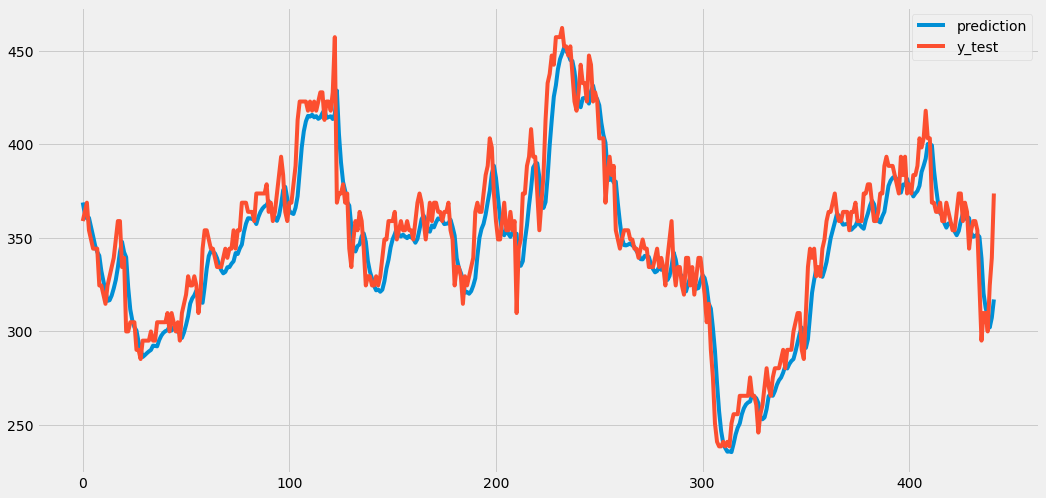

In [361]:
plt.figure(figsize=(16,8))
plt.plot(predictions,label = 'prediction')
plt.plot(y_test,label = 'y_test')
plt.legend(loc = 'best')
plt.show()

In [201]:
aa = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print(aa[-3:])
print(aa[2:6])
print(aa[:-4])
print(aa[-4:14])
print(aa[3:])
print(aa[:3])

[13, 14, 15]
[2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2]


In [196]:
y = np.array([0,1,2,3,4,5])
y

array([0, 1, 2, 3, 4, 5])

In [222]:
# slopes=[]
# xx=[]
# zz=[]
# for i in range(p_input_lstm, len(aa)-p_agg_out+1):
#     x = np.array(aa[i-p_input_lstm:i])
#     z = np.array(aa[i:+i+p_agg_out])
#     xx.append(x)
#     zz.append(z)
# #     model = LinearRegression().fit(x, y)
# #     slopes.append(model.coef_[0])
# print(xx)
# print()
# print(zz)


[array([0, 1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5, 6]), array([2, 3, 4, 5, 6, 7]), array([3, 4, 5, 6, 7, 8])]

[array([ 6,  7,  8,  9, 10, 11, 12]), array([ 7,  8,  9, 10, 11, 12, 13]), array([ 8,  9, 10, 11, 12, 13, 14]), array([ 9, 10, 11, 12, 13, 14, 15])]


In [495]:
df = pd.read_csv('./dataset/raw_stock_data/WSKT.JK.csv')
df = df.dropna()

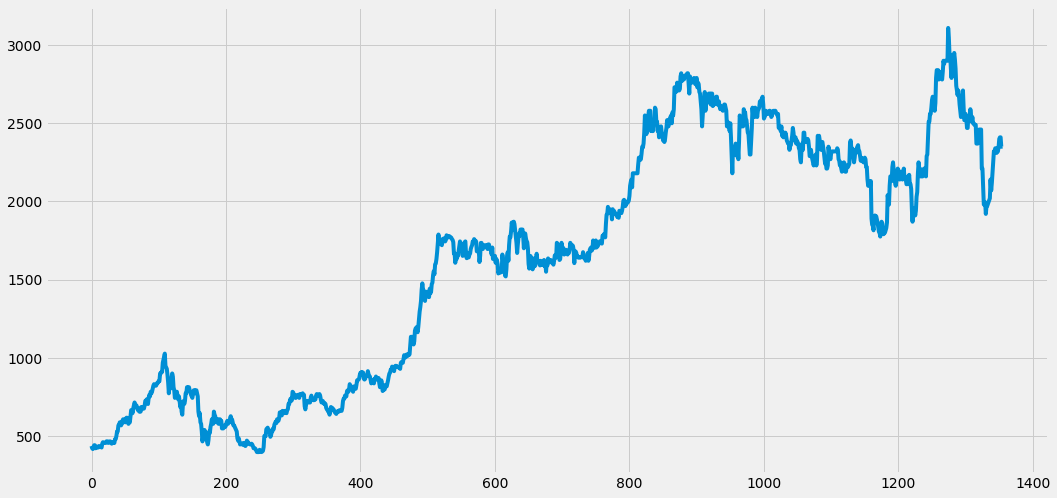

In [496]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()

In [497]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-19,434.794006,478.761993,410.367004,434.794006,405.065308,804820038.0
1,2012-12-20,420.138000,439.678986,420.138000,420.138000,391.411377,74036574.0
2,2012-12-21,415.252014,429.907990,410.367004,415.252014,386.859467,44783640.0
3,2012-12-26,429.907990,429.907990,415.252014,429.907990,400.513336,3.0
4,2012-12-27,439.678986,449.450012,425.023010,439.678986,409.616272,91169017.0


In [498]:
data_close = df.filter(['Close'])
data_open = df.filter(['Open'])

dataset_close = data_close.values
dataset_open = data_open.values
# scale the data
scaler_close = MinMaxScaler(feature_range=(0,1))
scaler_open = MinMaxScaler(feature_range=(0,1))

scaled_close = scaler_close.fit_transform(dataset_close)
scaled_open = scaler_open.fit_transform(dataset_open)
if scaled_close.shape == scaled_open.shape:
    print('sama')

sama


In [499]:
x_train=[]
y_train=[] 
x_test=[]
y_test=[]
train_limit = p_input_lstm + int((len(scaled_open)-p_agg_out-p_input_lstm)*propotion_train_test)
for i in range(p_input_lstm, len(scaled_open)-p_agg_out+1):
    if i <= train_limit:
        x_train.append(scaled_open[i-p_input_lstm:i, 0])
        rerata = np.mean(scaled_close[i:i+p_agg_out,0])
        y_train.append(rerata)
    else:
        x_test.append(scaled_open[i-p_input_lstm:i, 0])
        rerata = np.mean(scaled_close[i:i+p_agg_out,0])
        y_test.append(rerata)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [500]:
model = Sequential([
    LSTM(75, input_shape=(x_train.shape[1],1)),
    Dense(30),
    Dense(1)
])
model.compile(
    optimizer = 'adam',
    loss ='mean_squared_error'
)
model.fit(
    x_train, y_train, batch_size=10, epochs=5
)

Epoch 1/5
122/122 [==============================] - 2s 16ms/step - loss: 0.0112
Epoch 2/5
122/122 [==============================] - 2s 16ms/step - loss: 0.0011
Epoch 3/5
122/122 [==============================] - 2s 15ms/step - loss: 0.0011
Epoch 4/5
122/122 [==============================] - 2s 15ms/step - loss: 0.0011
Epoch 5/5
122/122 [==============================] - 2s 15ms/step - loss: 9.0819e-04


0.01093800014360655


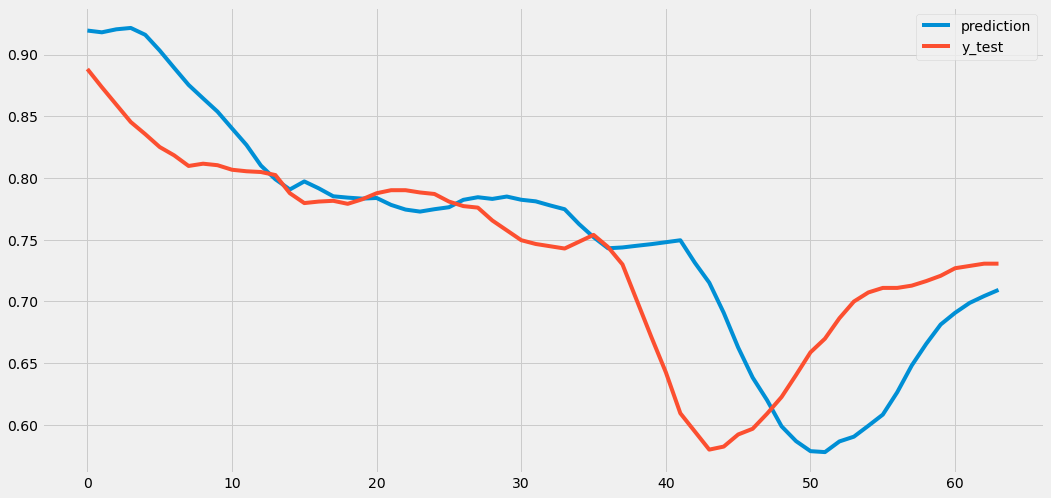

In [501]:
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
plt.figure(figsize=(16,8))
plt.plot(predictions[:],label = 'prediction')
plt.plot(y_test[:],label = 'y_test')
plt.legend(loc = 'best')
plt.show()

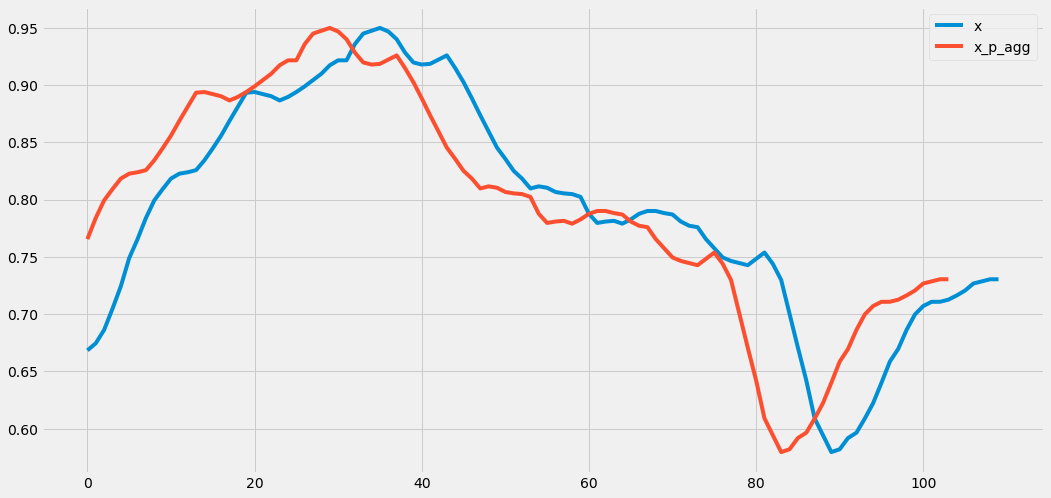

In [502]:
xx = scaled_close[-115:]
x=[]
for i in range(len(xx)-p_agg_out+1):
    x.append(np.mean(xx[i:i+p_agg_out,0]))
    
plt.figure(figsize=(16,8))
plt.plot(x,label = 'x')
plt.plot(x[p_agg_out:],label = 'x_p_agg')
plt.legend(loc = 'best')
plt.show()
    